# Credit Card Fraud Detection Project
## The goal is to detect fradulent credit card transactions. We have used the credit card data from Kaggle.
Dataset source link: https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud?resource=download

In [1]:
import pandas as pd
import sklearn as sk

In [2]:
# load the data

import pandas as pd
pd.options.display.max_columns = None

data = pd.read_csv("creditcard.csv")
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
#shape of data
data.shape

(284807, 31)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
#checking null values in the dataset

data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [6]:
#Using feature scaling for the column Amount, as the column is in different scale

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

#converting/feature scaling the amount column
data['Amount'] = sc.fit_transform(data[['Amount']])

In [7]:
data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,-1.593105,2.711941,-0.689256,4.626942,-0.924459,1.107641,1.991691,0.510632,-0.682920,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,-0.350151,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,-0.150189,0.915802,1.214756,-0.675143,1.164931,-0.711757,-0.025693,-1.221179,-1.545556,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,-0.254117,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,0.411614,0.063119,-0.183699,-0.510602,1.329284,0.140716,0.313502,0.395652,-0.577252,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,-0.081839,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,-1.933849,-0.962886,-1.042082,0.449624,1.962563,-0.608577,0.509928,1.113981,2.897849,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,-0.313249,0


In [8]:
# Dropping the Time column, doesn't affect the target variable directly

data = data.drop(['Time'], axis=1)

In [9]:
# dropping the duplicates from the data

data = data.drop_duplicates()

## Handling data imbalance issue

In [10]:
# Target variable 'Class' is imbalanced, having uneven observation in both classes

data['Class'].value_counts()

Class
0    275190
1       473
Name: count, dtype: int64

# Handling imbalanced data: undersampling

In [11]:
normal_data = data[data['Class'] == 0]
print("Total number of normal transactions:", normal_data.shape[0])

Total number of normal transactions: 275190


In [12]:
fraud_data = data[data['Class'] == 1]
print("Total number of fraudulent transactions:", fraud_data.shape[0])

Total number of fraudulent transactions: 473


In [13]:
# selecting random 473 samples from normal transactions (we randomly delete rows from majority class to match it with minority class)
normal_sample = normal_data.sample(473)

In [14]:
# Creating new dataframe after undersampling

new_data1 = pd.concat([normal_sample, fraud_data], ignore_index=True)

new_data1['Class'].value_counts()

Class
0    473
1    473
Name: count, dtype: int64

In [15]:
new_data1

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.235196,0.855171,2.107511,-2.087283,-0.742959,-0.791858,0.245201,0.225232,1.216178,-1.683056,-0.572780,0.940386,0.660103,-0.441179,0.466341,-0.228326,-0.444798,0.150025,-0.216739,-0.007892,0.006100,0.304867,-0.346562,0.413725,0.624028,-0.858421,-0.068795,-0.151324,-0.317726,0
1,1.137881,-1.122131,1.270094,-0.661879,-1.829914,-0.174754,-1.330653,0.180918,-0.396554,0.719582,1.303910,-0.095171,0.023196,-0.347689,0.659830,1.926559,-0.281347,-0.084759,0.365904,0.271979,0.536963,1.260350,-0.168420,0.381740,0.242037,-0.068646,0.035238,0.037852,0.046579,0
2,-1.413962,1.548400,0.143719,-0.752192,-0.614794,0.996245,-1.772130,-1.600495,-0.590855,-1.337001,-1.708389,0.206776,0.611631,0.838644,1.660926,0.764697,0.043212,-0.021388,0.798718,0.511864,-1.216683,0.270496,0.255001,-1.261547,-0.917936,1.320042,-0.322268,0.042952,-0.289260,0
3,1.048833,-0.466690,1.279250,1.004172,-1.473146,-0.514305,-0.671442,0.144976,1.187282,-0.211384,-0.761618,-0.452119,-1.888042,0.000408,0.389944,0.163644,0.053516,-0.099340,-0.168473,-0.117658,-0.058061,-0.194231,0.045141,0.711476,0.126611,0.296523,-0.005606,0.036354,-0.093394,0
4,1.273410,-0.855358,0.447224,-0.665512,-0.929313,0.207395,-0.886973,0.245809,-0.423979,0.627464,0.825430,-0.338970,-1.285301,-0.045728,-0.696033,0.736971,0.628324,-1.462940,0.997634,0.004166,-0.030581,-0.128700,0.002129,-0.318100,0.328807,-0.298771,0.020062,0.002076,-0.217294,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
941,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,-5.587794,2.115795,-5.417424,-1.235123,-6.665177,0.401701,-2.897825,-4.570529,-1.315147,0.391167,1.252967,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,1.206024,1
942,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,-3.232153,2.858466,-3.096915,-0.792532,-5.210141,-0.613803,-2.155297,-3.267116,-0.688505,0.737657,0.226138,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,-0.350191,1
943,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,-3.463891,1.794969,-2.775022,-0.418950,-4.057162,-0.712616,-1.603015,-5.035326,-0.507000,0.266272,0.247968,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,-0.041818,1
944,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,-5.245984,1.933520,-5.030465,-1.127455,-6.416628,0.141237,-2.549498,-4.614717,-1.478138,-0.035480,0.306271,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,0.626302,1


In [16]:
X = new_data1.drop('Class', axis=1)
y = new_data1['Class']

In [17]:
# Split dataset into training and test

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 45)

# Model Building with undersampling data: Logistic Regression Classifier

In [18]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

lr.fit(X_train, y_train)

LogisticRegression()

In [19]:
#prediction
y_pred = lr.predict(X_test)

In [20]:
# checking accuracy

from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.9368421052631579

In [21]:
from sklearn.metrics import precision_score, recall_score, f1_score

print("precision score:", precision_score(y_test, y_pred))
print("recall:", recall_score(y_test, y_pred))
print("F1 score:", f1_score(y_test, y_pred))

precision score: 0.9882352941176471
recall: 0.8842105263157894
F1 score: 0.9333333333333333


In [22]:
# We could see precision, recall and F1 score giving better results after doing undersampling. Accuracy is not a good metric to use for imbalanced dataset.

# Model Building with undersampling data: Decision Tree Classifier

In [23]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()

dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [24]:
y_pred2 = dt.predict(X_test)

In [25]:
print("accuray:", accuracy_score(y_test, y_pred2))
print("precision:", precision_score(y_test, y_pred2))
print("recall:", recall_score(y_test, y_pred2))
print("F1 score:", f1_score(y_test, y_pred2))

accuray: 0.9
precision: 0.9130434782608695
recall: 0.8842105263157894
F1 score: 0.8983957219251337


# Model Building with undersampling data: Random Forest Classifier

In [26]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()

rf.fit(X_train, y_train)

RandomForestClassifier()

In [27]:
y_pred3 = rf.predict(X_test)

In [28]:
print("accuray:", accuracy_score(y_test, y_pred3))
print("precision:", precision_score(y_test, y_pred3))
print("recall:", recall_score(y_test, y_pred3))
print("F1 score:", f1_score(y_test, y_pred3))

accuray: 0.9421052631578948
precision: 1.0
recall: 0.8842105263157894
F1 score: 0.9385474860335196


In [29]:
# creating the final dataframe with models and accuracy scores
final_data = pd.DataFrame({'Models': ['LR', 'Decision Tree', 'Random Forest'],
                           'Accuracy': [accuracy_score(y_test, y_pred)*100,
                                        accuracy_score(y_test, y_pred2) *100,
                                        accuracy_score(y_test, y_pred3)* 100
                                        ]})

In [30]:
final_data

,Models,Accuracy
0,LR,93.684211
1,Decision Tree,90.000000
2,Random Forest,94.210526


In [31]:
final_data['Models'] = final_data['Models'].astype(str)

<Axes: xlabel='Models', ylabel='Accuracy'>

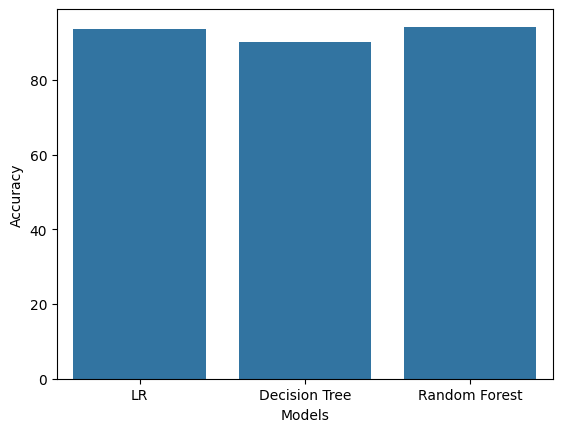

In [32]:
import seaborn as sns
sns.barplot(x='Models', y= 'Accuracy', data = final_data)

# Oversampling
 With undersampling we generally lose a lot of valuable data, so we use SMOTE to randomly increasing minority class examples to make a balanced dataset.

 * It uses linear interpolation to generate new data points for minority class using synthetic data.

In [33]:
data = pd.read_csv("creditcard.csv")

#Using feature scaling for the column Amount, as the column is in different scale

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

#converting/feature scaling the amount column
data['Amount'] = sc.fit_transform(data[['Amount']])

In [34]:
data = data.drop(['Time'], axis=1)

data = data.drop_duplicates()

In [35]:
X = data.drop('Class', axis=1)
y = data['Class']

In [36]:
X.shape

(275663, 29)

In [37]:
y.shape

(275663,)

In [38]:
#using SMOTE

from imblearn.over_sampling import SMOTE

In [39]:
#resample

X_res, y_res = SMOTE().fit_resample(X, y)

In [40]:
y_res.value_counts()

Class
0    275190
1    275190
Name: count, dtype: int64

In [41]:
# Split dataset into training and test

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_res,y_res, test_size = 0.2, random_state = 45)

# Logistic regression with oversampling data

In [42]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

lr.fit(X_train, y_train)

#prediction
y_pred = lr.predict(X_test)

In [43]:
print("accuray:", accuracy_score(y_test, y_pred))
print("precision:", precision_score(y_test, y_pred))
print("recall:", recall_score(y_test, y_pred))
print("F1 score:", f1_score(y_test, y_pred))

accuray: 0.9439659871361604
precision: 0.9719273231729639
recall: 0.9145861662587255
F1 score: 0.942385293678075


# Decision Tree with Oversampling Data

In [44]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()

dt.fit(X_train, y_train)

y_pred2 = dt.predict(X_test)

In [45]:
print("accuray:", accuracy_score(y_test, y_pred2))
print("precision:", precision_score(y_test, y_pred2))
print("recall:", recall_score(y_test, y_pred2))
print("F1 score:", f1_score(y_test, y_pred2))

accuray: 0.9981376503506668
precision: 0.9973750905141202
recall: 0.9989121566494424
F1 score: 0.9981430318402101


# Random Forest with Oversampling data

In [46]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()

rf.fit(X_train, y_train)

y_pred3 = rf.predict(X_test)

In [47]:
print("accuray:", accuracy_score(y_test, y_pred3))
print("precision:", precision_score(y_test, y_pred3))
print("recall:", recall_score(y_test, y_pred3))
print("F1 score:", f1_score(y_test, y_pred3))

accuray: 0.9997819688215415
precision: 0.9995650519219268
recall: 1.0
F1 score: 0.9997824786557181


In [48]:
# creating the final dataframe with models and accuracy scores
final_data = pd.DataFrame({'Models': ['LR', 'Decision Tree', 'Random Forest'],
                           'Accuracy': [accuracy_score(y_test, y_pred)*100,
                                        accuracy_score(y_test, y_pred2) *100,
                                        accuracy_score(y_test, y_pred3)* 100
                                        ]})

In [49]:
final_data

,Models,Accuracy
0,LR,94.396599
1,Decision Tree,99.813765
2,Random Forest,99.978197


<Axes: xlabel='Models', ylabel='Accuracy'>

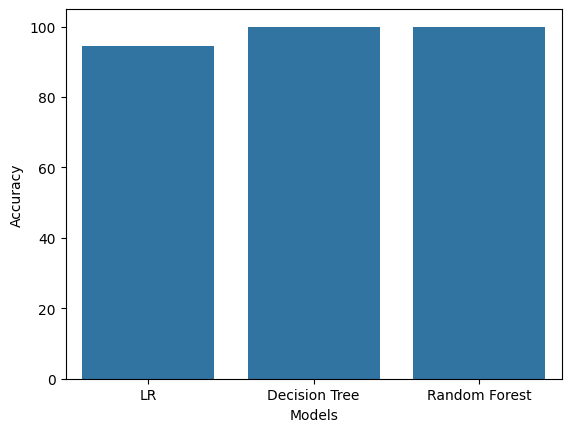

In [50]:
import seaborn as sns
sns.barplot(x='Models', y= 'Accuracy', data = final_data)

In [51]:
#Random Forest model is performing the best in this case

# Saving the model

#### we will be saving the best performing model Random forest classfier to train on the entire dataset (oversampled) for later usecases.

In [52]:
rf_model = RandomForestClassifier()
rf_model.fit(X_res, y_res)

RandomForestClassifier()

In [53]:
import pickle

# Save the model to a file
with open('credit_card_RF_model.pkl', 'wb') as file:
    pickle.dump(rf_model, file)